In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import seaborn as sns
import pandas as pd
import os
import MDAnalysis as mda
from MDAnalysis.coordinates.GRO import GROWriter
from scipy.spatial import Voronoi
from MDAnalysis.lib.distances import distance_array


In [141]:
xticks = ['Nterm', 'AH', 'Cterm']
yticks = ['Nterm', 'AH', 'Cterm']



In [108]:
def compute_contact_heatmap(universe, prot_selection, ti=0, tf=500, distance_cutoff=5.0, n_residues=34, plot=True, sav_file='N1.png'):
    """
    Computes and optionally plots the contact heatmap between two protein segments over the first `n_frames`.

    Parameters:
        universe (MDAnalysis.Universe): Universe containing the trajectory.
        prot_selection (str): Atom selection string for the protein.
        n_frames (int): Number of frames to process (default: 50).
        distance_cutoff (float): Distance cutoff for considering a contact (default: 5.0 Å).
        n_residues (int): Number of residues per protein segment (default: 34).
        plot (bool): Whether to plot the heatmap (default: True).

    Returns:
        avg_contacts (np.ndarray): Averaged contact map over the selected frames.
    """
    prot = universe.select_atoms(prot_selection)
    DIST = []

    for ts in universe.trajectory[ti:tf]:
        prot1 = prot[:592]
        prot2 = prot[592:]
        D = distance_array(prot1.positions, prot2.positions, ts.dimensions)
        p1, p2 = np.where(D < distance_cutoff)

        POP = np.zeros((3, 3))
        p1_resids = prot1[p1].resids
        p2_resids = prot2[p2].resids

        for i, j in zip(p1_resids, p2_resids):
            if (i<=8) and (j<=8):
                POP[0,0] += 1
            elif (i<=8) and (j>8) and (j<=18+8):
                POP[0, 1] += 1
            elif (i<=8) and (j>18+8):
                POP[0,2] +=1
            elif (i>8) and (i<=18+8) and (j<=8):
                POP[1, 0] += 1
            elif (i>8) and (i<=18+8) and (j>8) and (j<=18+8):
                POP[1, 1] += 1
            elif (i>8) and (i<=18+8) and (j>18+8):
                POP[1, 2] += 1
            elif (i>18+8) and (j<=8):
                POP[2, 0] += 1
            elif (i>18+8) and (j>8) and (j<=18+8):
                POP[2, 1] += 1
            elif (i>18+8) and (j>18+8):
                POP[2, 2] += 1
        POP = np.array(POP)    
        DIST.append(POP > 0)

    avg_contacts = np.mean(DIST, axis=0)

    if plot:
        plt.figure(figsize=(8, 6))
        sns.heatmap(avg_contacts, cmap="Reds")
        plt.title("Average Contact Heatmap")
        plt.xlabel("Floating Peptide")
        plt.ylabel("Absorbed Peptide")
        plt.savefig(sav_file, dpi=300)

    return avg_contacts

/mnt/home/asahoo/venv/lib/python3.8/site-packages/MDAnalysis/coordinates/XDR.py:203: UserWarning: Cannot write lock/offset file in same location as {self.filename}. Using slow offset calculation.
  warnings.warn(f"Cannot write lock/offset file in same location as "
/mnt/home/asahoo/venv/lib/python3.8/site-packages/MDAnalysis/coordinates/XDR.py:259: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N2/.traj_continuous_v1_400_reduced.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))
/mnt/home/asahoo/venv/lib/python3.8/site-packages/MDAnalysis/coordinates/XDR.py:259: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N4/.traj_continuous_v1_400_reduced.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))
/mnt/home/asahoo/venv/lib/python3.8/site-packages/MDAnalysis/coordinates/XDR.py:259: U

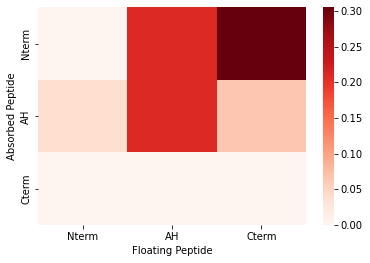

In [145]:
ti=0
tf=50
u = mda.Universe('/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N2/traj_continuous_v1_400_reduced.pdb', '/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N2/traj_continuous_v1_400_reduced.xtc')
D1 = compute_contact_heatmap(u, 'protein', ti=ti, tf=tf, distance_cutoff=4.0, n_residues=34, plot=False, sav_file='N2.png')
u = mda.Universe('/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N4/traj_continuous_v1_400_reduced.pdb', '/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N4/traj_continuous_v1_400_reduced.xtc')
D2 = compute_contact_heatmap(u, 'protein', ti=ti, tf=tf, distance_cutoff=4.0, n_residues=34, plot=False, sav_file='N4.png')
u = mda.Universe('/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N5/traj_continuous_v1_400_reduced.pdb', '/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N5/traj_continuous_v1_400_reduced.xtc')
D3 = compute_contact_heatmap(u, 'protein', ti=ti, tf=tf, distance_cutoff=4.0, n_residues=34, plot=False, sav_file='N5.png')
u = mda.Universe('/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N7/traj_continuous_v1_400_reduced.pdb', '/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N7/traj_continuous_v1_400_reduced.xtc')
D4 = compute_contact_heatmap(u, 'protein', ti=ti, tf=tf, distance_cutoff=4.0, n_residues=34, plot=False, sav_file='N7.png')
sns.heatmap((D1+D2+D3+D4)/4.0, cmap="Reds", xticklabels=xticks, yticklabels=yticks)
plt.xlabel("Floating Peptide")
plt.ylabel("Absorbed Peptide")
plt.savefig(str(ti)+'_'+str(tf)+'.svg', dpi=300)


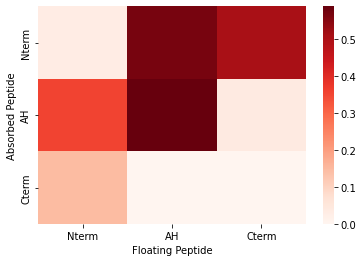

In [147]:
ti=50
tf=1000
u = mda.Universe('/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N2/traj_continuous_v1_400_reduced.pdb', '/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N2/traj_continuous_v1_400_reduced.xtc')
D1 = compute_contact_heatmap(u, 'protein', ti=ti, tf=tf, distance_cutoff=4.0, n_residues=34, plot=False, sav_file='N2.png')
u = mda.Universe('/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N4/traj_continuous_v1_400_reduced.pdb', '/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N4/traj_continuous_v1_400_reduced.xtc')
D2 = compute_contact_heatmap(u, 'protein', ti=ti, tf=tf, distance_cutoff=4.0, n_residues=34, plot=False, sav_file='N4.png')
u = mda.Universe('/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N5/traj_continuous_v1_400_reduced.pdb', '/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N5/traj_continuous_v1_400_reduced.xtc')
D3 = compute_contact_heatmap(u, 'protein', ti=ti, tf=tf, distance_cutoff=4.0, n_residues=34, plot=False, sav_file='N5.png')
u = mda.Universe('/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N7/traj_continuous_v1_400_reduced.pdb', '/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N7/traj_continuous_v1_400_reduced.xtc')
D4 = compute_contact_heatmap(u, 'protein', ti=ti, tf=tf, distance_cutoff=4.0, n_residues=34, plot=False, sav_file='N7.png')
sns.heatmap((D1+D2+D3+D4)/4.0, cmap="Reds", xticklabels=xticks, yticklabels=yticks)
plt.xlabel("Floating Peptide")
plt.ylabel("Absorbed Peptide")
plt.savefig(str(ti)+'_'+str(tf)+'.svg', dpi=300)

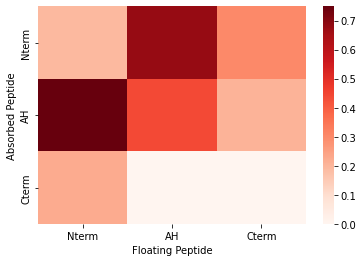

In [148]:
ti=1000
tf=1500
u = mda.Universe('/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N2/traj_continuous_v1_400_reduced.pdb', '/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N2/traj_continuous_v1_400_reduced.xtc')
D1 = compute_contact_heatmap(u, 'protein', ti=ti, tf=tf, distance_cutoff=4.0, n_residues=34, plot=False, sav_file='N2.png')
u = mda.Universe('/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N4/traj_continuous_v1_400_reduced.pdb', '/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N4/traj_continuous_v1_400_reduced.xtc')
D2 = compute_contact_heatmap(u, 'protein', ti=ti, tf=tf, distance_cutoff=4.0, n_residues=34, plot=False, sav_file='N4.png')
u = mda.Universe('/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N5/traj_continuous_v1_400_reduced.pdb', '/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N5/traj_continuous_v1_400_reduced.xtc')
D3 = compute_contact_heatmap(u, 'protein', ti=ti, tf=tf, distance_cutoff=4.0, n_residues=34, plot=False, sav_file='N5.png')
u = mda.Universe('/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N7/traj_continuous_v1_400_reduced.pdb', '/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N7/traj_continuous_v1_400_reduced.xtc')
D4 = compute_contact_heatmap(u, 'protein', ti=ti, tf=tf, distance_cutoff=4.0, n_residues=34, plot=False, sav_file='N7.png')
sns.heatmap((D1+D2+D3+D4)/4.0, cmap="Reds", xticklabels=xticks, yticklabels=yticks)
plt.xlabel("Floating Peptide")
plt.ylabel("Absorbed Peptide")
plt.savefig(str(ti)+'_'+str(tf)+'.svg', dpi=300)

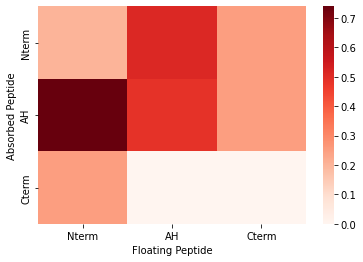

In [149]:
ti=1500
tf=2000
u = mda.Universe('/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N2/traj_continuous_v1_400_reduced.pdb', '/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N2/traj_continuous_v1_400_reduced.xtc')
D1 = compute_contact_heatmap(u, 'protein', ti=ti, tf=tf, distance_cutoff=4.0, n_residues=34, plot=False, sav_file='N2.png')
u = mda.Universe('/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N4/traj_continuous_v1_400_reduced.pdb', '/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N4/traj_continuous_v1_400_reduced.xtc')
D2 = compute_contact_heatmap(u, 'protein', ti=ti, tf=tf, distance_cutoff=4.0, n_residues=34, plot=False, sav_file='N4.png')
u = mda.Universe('/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N5/traj_continuous_v1_400_reduced.pdb', '/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N5/traj_continuous_v1_400_reduced.xtc')
D3 = compute_contact_heatmap(u, 'protein', ti=ti, tf=tf, distance_cutoff=4.0, n_residues=34, plot=False, sav_file='N5.png')
u = mda.Universe('/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N7/traj_continuous_v1_400_reduced.pdb', '/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N7/traj_continuous_v1_400_reduced.xtc')
D4 = compute_contact_heatmap(u, 'protein', ti=ti, tf=tf, distance_cutoff=4.0, n_residues=34, plot=False, sav_file='N7.png')
sns.heatmap((D1+D2+D3+D4)/4.0, cmap="Reds", xticklabels=xticks, yticklabels=yticks)
plt.xlabel("Floating Peptide")
plt.ylabel("Absorbed Peptide")
plt.savefig(str(ti)+'_'+str(tf)+'.svg', dpi=300)

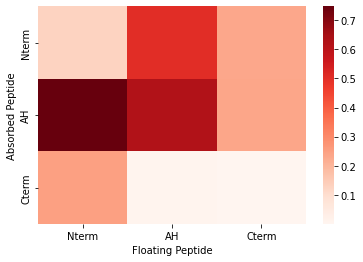

In [150]:
ti=2000
tf=4000
u = mda.Universe('/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N2/traj_continuous_v1_400_reduced.pdb', '/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N2/traj_continuous_v1_400_reduced.xtc')
D1 = compute_contact_heatmap(u, 'protein', ti=ti, tf=tf, distance_cutoff=4.0, n_residues=34, plot=False, sav_file='N2.png')
u = mda.Universe('/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N4/traj_continuous_v1_400_reduced.pdb', '/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N4/traj_continuous_v1_400_reduced.xtc')
D2 = compute_contact_heatmap(u, 'protein', ti=ti, tf=tf, distance_cutoff=4.0, n_residues=34, plot=False, sav_file='N4.png')
u = mda.Universe('/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N5/traj_continuous_v1_400_reduced.pdb', '/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N5/traj_continuous_v1_400_reduced.xtc')
D3 = compute_contact_heatmap(u, 'protein', ti=ti, tf=tf, distance_cutoff=4.0, n_residues=34, plot=False, sav_file='N5.png')
u = mda.Universe('/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N7/traj_continuous_v1_400_reduced.pdb', '/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N7/traj_continuous_v1_400_reduced.xtc')
D4 = compute_contact_heatmap(u, 'protein', ti=ti, tf=tf, distance_cutoff=4.0, n_residues=34, plot=False, sav_file='N7.png')
sns.heatmap((D1+D2+D3+D4)/4.0, cmap="Reds", xticklabels=xticks, yticklabels=yticks)
plt.xlabel("Floating Peptide")
plt.ylabel("Absorbed Peptide")
plt.savefig(str(ti)+'_'+str(tf)+'.svg', dpi=300)

/mnt/home/asahoo/venv/lib/python3.8/site-packages/MDAnalysis/coordinates/XDR.py:259: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N4/.traj_continuous_v1_400_reduced.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


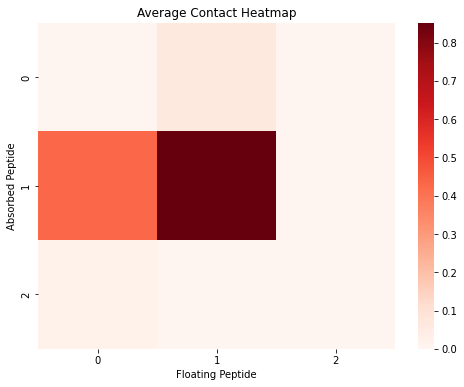

In [121]:
u = mda.Universe('/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N4/traj_continuous_v1_400_reduced.pdb', '/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N4/traj_continuous_v1_400_reduced.xtc')
D2 = compute_contact_heatmap(u, 'protein', ti=0, tf=500, distance_cutoff=4.0, n_residues=34, plot=True, sav_file='N4.png')

/mnt/home/asahoo/venv/lib/python3.8/site-packages/MDAnalysis/coordinates/XDR.py:259: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N5/.traj_continuous_v1_400_reduced.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


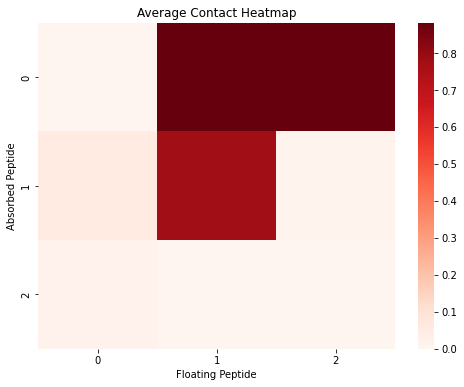

In [122]:
u = mda.Universe('/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N5/traj_continuous_v1_400_reduced.pdb', '/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N5/traj_continuous_v1_400_reduced.xtc')
D3 = compute_contact_heatmap(u, 'protein', ti=0, tf=500, distance_cutoff=4.0, n_residues=34, plot=True, sav_file='N5.png')

/mnt/home/asahoo/venv/lib/python3.8/site-packages/MDAnalysis/coordinates/XDR.py:259: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N7/.traj_continuous_v1_400_reduced.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


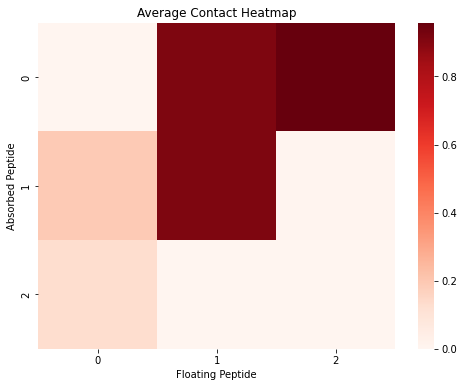

In [123]:
u = mda.Universe('/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N7/traj_continuous_v1_400_reduced.pdb', '/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N7/traj_continuous_v1_400_reduced.xtc')
D4 = compute_contact_heatmap(u, 'protein', ti=0, tf=500, distance_cutoff=4.0, n_residues=34, plot=True, sav_file='N7.png')

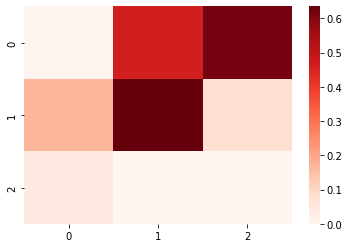

In [124]:
sns.heatmap((D1+D2+D3+D4)/4.0, cmap="Reds")
plt.savefig('first_contact.png', dpi=300)

In [96]:
u = mda.Universe('/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N5/traj_continuous_v1_400_reduced.pdb', '/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N5/traj_continuous_v1_400_reduced.xtc')

/mnt/home/asahoo/venv/lib/python3.8/site-packages/MDAnalysis/coordinates/XDR.py:203: UserWarning: Cannot write lock/offset file in same location as {self.filename}. Using slow offset calculation.
  warnings.warn(f"Cannot write lock/offset file in same location as "
/mnt/home/asahoo/venv/lib/python3.8/site-packages/MDAnalysis/coordinates/XDR.py:259: UserWarning: Couldn't save offsets because: [Errno 13] Permission denied: '/mnt/ceph/users/mmofidi/gromacs/reduced/multiple/N5/.traj_continuous_v1_400_reduced.xtc_offsets.npz'
  warnings.warn("Couldn't save offsets because: {}".format(e))


In [97]:
prot = u.select_atoms('protein')

In [103]:
prot1 = prot[:592]
prot2 = prot[592:]

In [104]:
p1_resids = prot1.resids
p2_resids = prot2.resids

In [107]:
p1_resids<8

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False,